In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def cal_reflection_coefficient(z2, z1):
    return (z2 - z1) / (z2 + z1)

In [118]:
ZL = 50-50j
Z1 = 50
r = cal_reflection_coefficient(ZL, Z1)
r

(0.2-0.4j)

Text(0.5, 0, 'Length (m)')

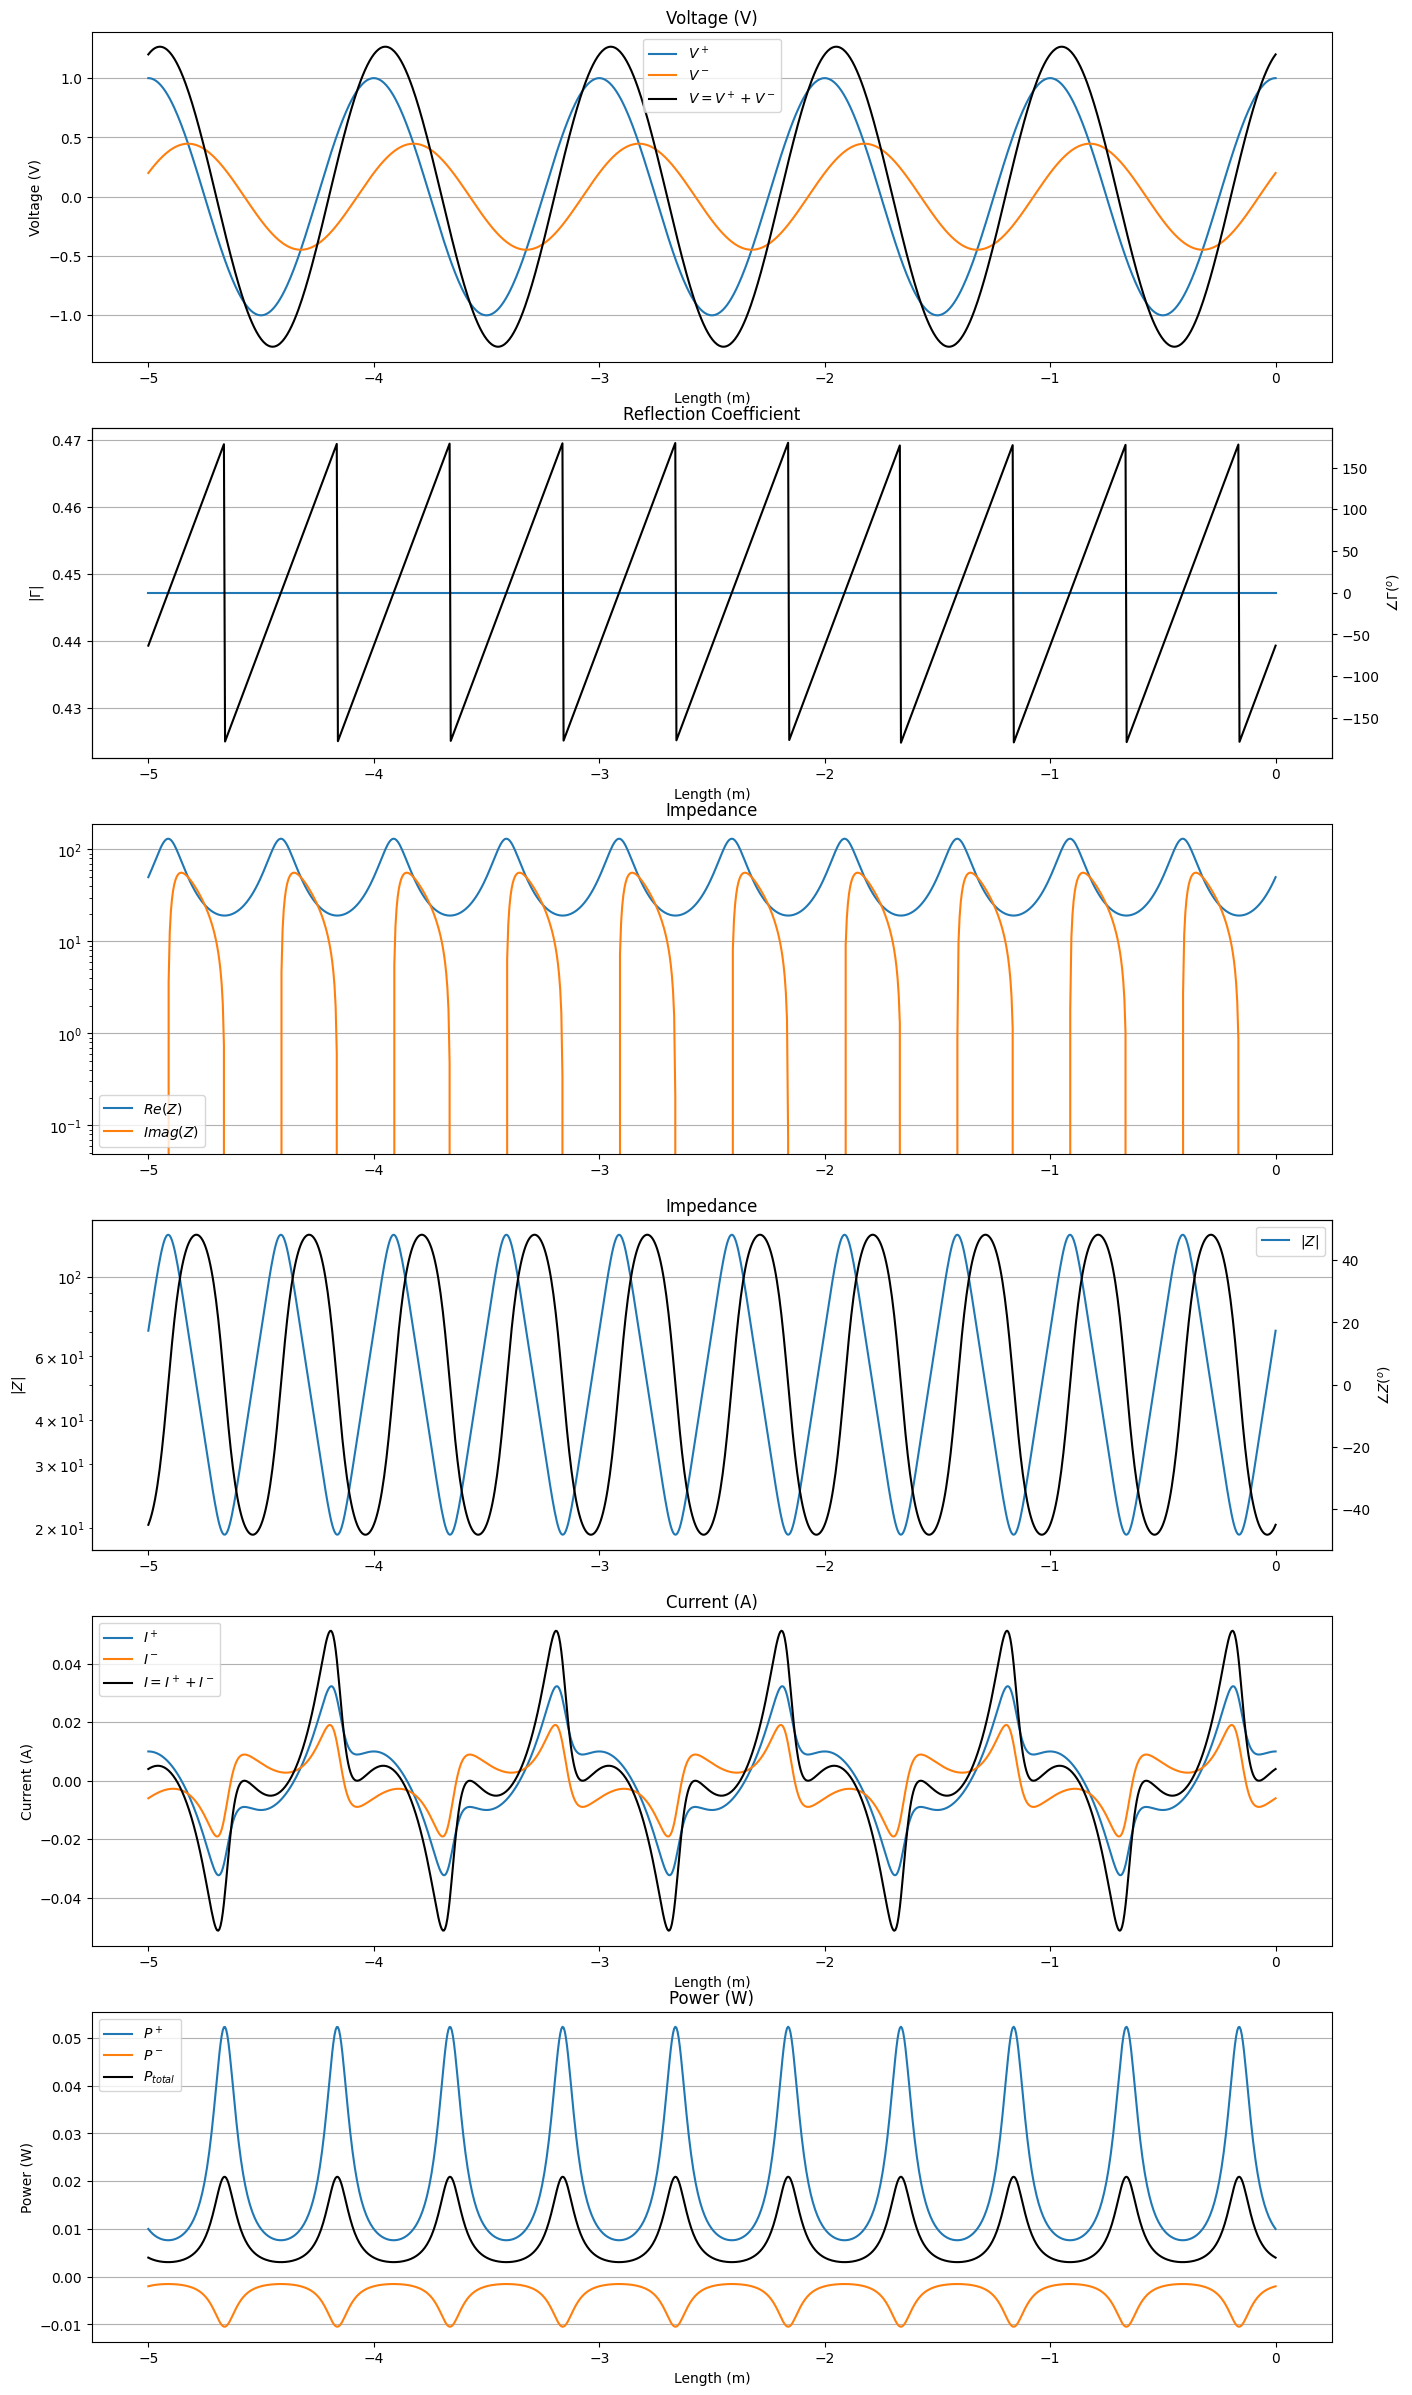

In [119]:
wv = 1
L = np.linspace(-5, 0, 1000)

V_plus = np.exp(-1j * 2 * np.pi * L / wv)
V_minus = r * np.exp(1j * 2 * np.pi * L / wv)
gamma_x = V_minus / V_plus
z = Z1 * (1 + gamma_x) / (1 - gamma_x)

I_plus = V_plus / z
I_minus = -V_minus / z

P_plus =  V_plus.conj() * I_plus 
P_minus = V_minus.conj() * I_minus
P_total = 0.5*np.real(P_plus + P_minus)

fig, ax = plt.subplots(6, 1, figsize=(16, 30))
ax[0].plot(L, np.real(V_plus), label=r'$V^+$')
ax[0].plot(L, np.real(V_minus), label=r'$V^-$')
ax[0].plot(L, np.real(V_plus + V_minus), 'k', label=r'$V=V^+ + V^-$')
ax[0].grid(axis='y')
ax[0].legend()
ax[0].set_title('Voltage (V)')
ax[0].set_ylabel('Voltage (V)')
ax[0].set_xlabel('Length (m)')

ax1 = ax[1].twinx()
ax[1].plot(L, np.abs(gamma_x), label=r'$\Gamma_{real}$')
ax1.plot(L, np.angle(gamma_x, deg=True), 'black', label=r'$\angle \Gamma (^o)$' )
ax[1].grid(axis='y')
ax[1].set_title('Reflection Coefficient')
ax[1].set_ylabel(r'$|\Gamma|$')
ax1.set_ylabel(r'$\angle \Gamma (^o)$')
ax[1].set_xlabel('Length (m)')

ax[2].plot(L, np.real(z), label=r'$Re(Z)$')
ax[2].plot(L, np.imag(z), label=r'$Imag(Z)$')
ax[2].grid(axis='y')
ax[2].set_yscale('log')
ax[2].legend()
ax[2].set_title('Impedance')

ax3 = ax[3].twinx()
ax[3].plot(L, np.abs(z), label=r'$|Z|$')
ax3.plot(L, np.angle(z, deg=True), 'black', label=r'$\angle Z$' )
ax[3].grid(axis='y')
ax[3].set_yscale('log')
ax[3].legend()
ax[3].set_title('Impedance')
ax[3].set_ylabel(r'$|Z|$')
ax3.set_ylabel(r'$\angle Z (^o)$')

ax[4].plot(L, np.real(I_plus), label=r'$I^+$')
ax[4].plot(L, np.real(I_minus), label=r'$I^-$')
ax[4].plot(L, np.real(I_plus + I_minus), 'k', label=r'$I=I^+ + I^-$')
ax[4].grid(axis='y')
ax[4].legend()
ax[4].set_title('Current (A)')
ax[4].set_ylabel('Current (A)')
ax[4].set_xlabel('Length (m)')

ax[5].plot(L, np.real(P_plus), label=r'$P^+$')
ax[5].plot(L, np.real(P_minus), label=r'$P^-$')
ax[5].plot(L, P_total, 'k', label=r'$P_{total}$')
ax[5].grid(axis='y')
ax[5].legend()
ax[5].set_title('Power (W)')
ax[5].set_ylabel('Power (W)')
ax[5].set_xlabel('Length (m)')
